# <center>***XGBoost***</center>
<br><br><br>

In [1]:
# !pip install xgboost
# !conda install python-graphviz -y

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split

import xgboost as xgb
import catboost as cat
import lightgbm as lgb

In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [4]:
df_reg = pd.read_csv("data\\boston_house_prices.csv", header=1)
df_cls = pd.read_csv("data\\iris.csv")

X1 = df_reg.drop("MEDV", axis=1)
y1 = df_reg.MEDV
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

X2 = df_cls.drop("virginica", axis=1)
y2 = df_cls.virginica
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

## **调用Scikit-Learn的API并调参**

In [5]:
# 尽量把学习率设置的高点，这样迭代的时间会短些
model1 = xgb.XGBRegressor(learning_rate=0.1)
param1 = {
        "max_depth":[4, 7, 10],
        'min_child_weight': [1, 3, 5],
        "n_estimators":[10, 50, 100],
        'gamma': [0.1, 0.3, 0.5],
        'reg_alpha': [0.05, 0.1, 1], 
        'reg_lambda': [0.05, 0.1, 1]
        }

grid_search1 = GridSearchCV(model1, n_jobs=-1, param_grid=param1, cv=5)
grid_search1.fit(X1_train, y1_train)
grid_search1.best_estimator_, grid_search1.best_score_

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...),
 0.8582103102134248)

In [6]:
# 尽量把学习率设置的高点，这样迭代的时间会短些
model2 = xgb.XGBClassifier(learning_rate=0.1)
param2 = {
        "max_depth":[4, 7, 10],
        'min_child_weight': [1, 3, 5],
        "n_estimators":[10, 50, 100],
        'gamma': [0.1, 0.3, 0.5],
        'reg_alpha': [0.05, 0.1, 1], 
        'reg_lambda': [0.05, 0.1, 1]
        }

grid_search2 = GridSearchCV(model2, n_jobs=-1, param_grid=param2, cv=5)
grid_search2.fit(X2_train, y2_train)
grid_search2.best_estimator_, grid_search2.best_score_

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=4, max_leaves=None,
               min_child_weight=1, missing=nan, monotone_constraints=None,
               n_estimators=10, n_jobs=None, num_parallel_tree=None,
               objective='multi:softprob', predictor=None, ...),
 0.9583333333333334)

## **使用最好的模型训练**

In [7]:
model1_plus = grid_search1.best_estimator_
y1_pred = model1_plus.fit(X1_train, y1_train).predict(X1_test)

In [8]:
model2_plus = grid_search2.best_estimator_
y2_pred = model2_plus.fit(X2_train, y2_train).predict(X2_test)

## **基于树模型的数据可视化**

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

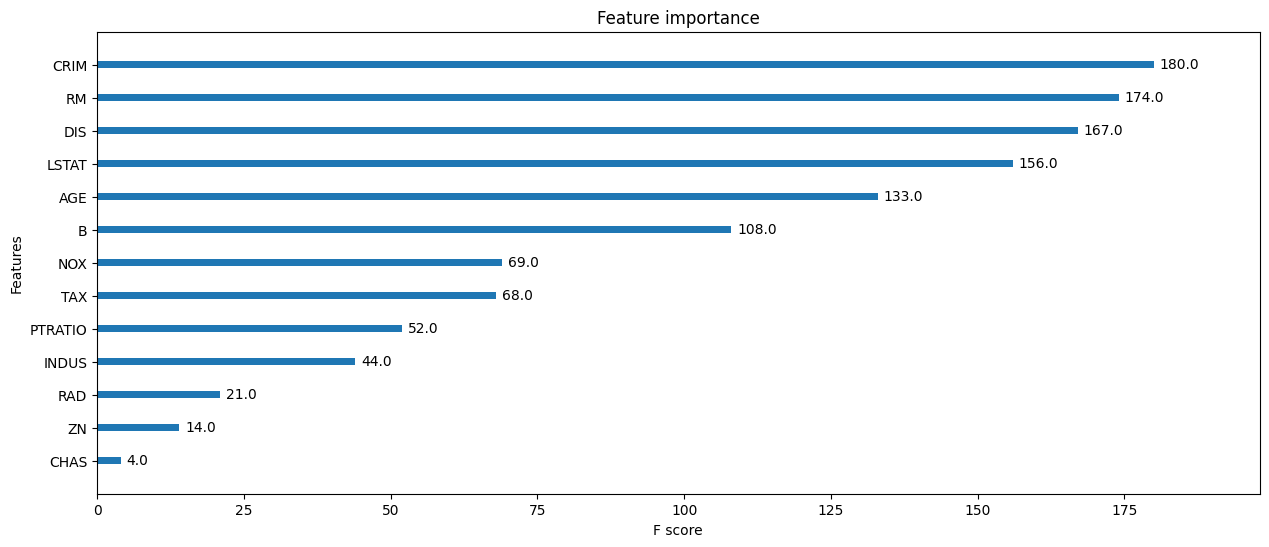

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
xgb.plot_importance(model1_plus, ax=ax, height=0.2, title='Feature importance', 
                xlabel='F score', ylabel='Features', grid=False, show_values=True)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

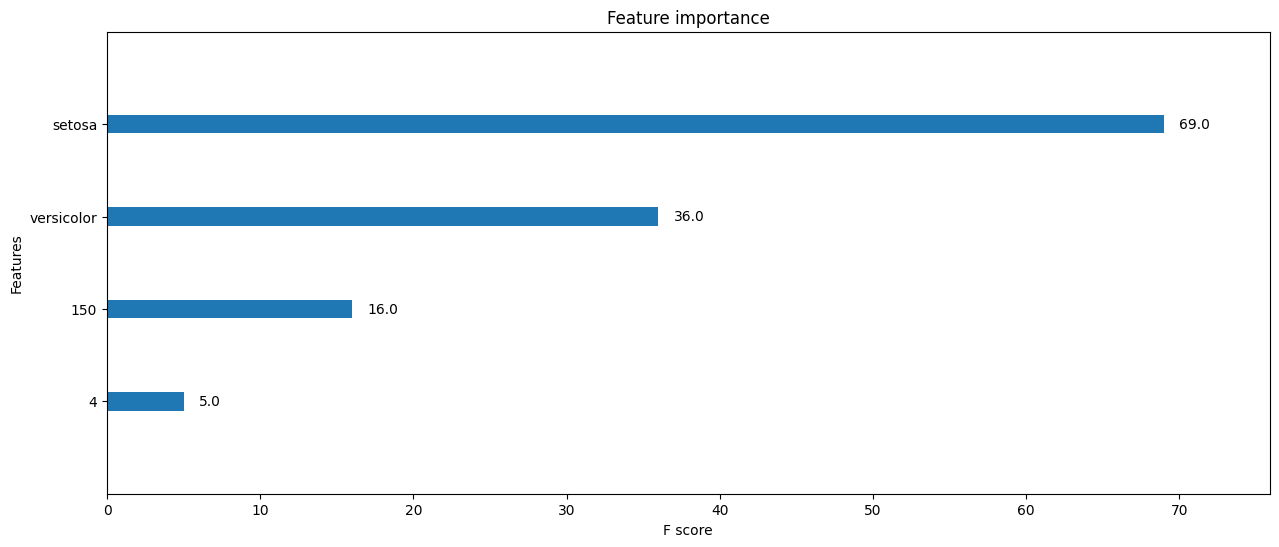

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
xgb.plot_importance(model2_plus, ax=ax, height=0.2, title='Feature importance', 
                xlabel='F score', ylabel='Features', grid=False, show_values=True)

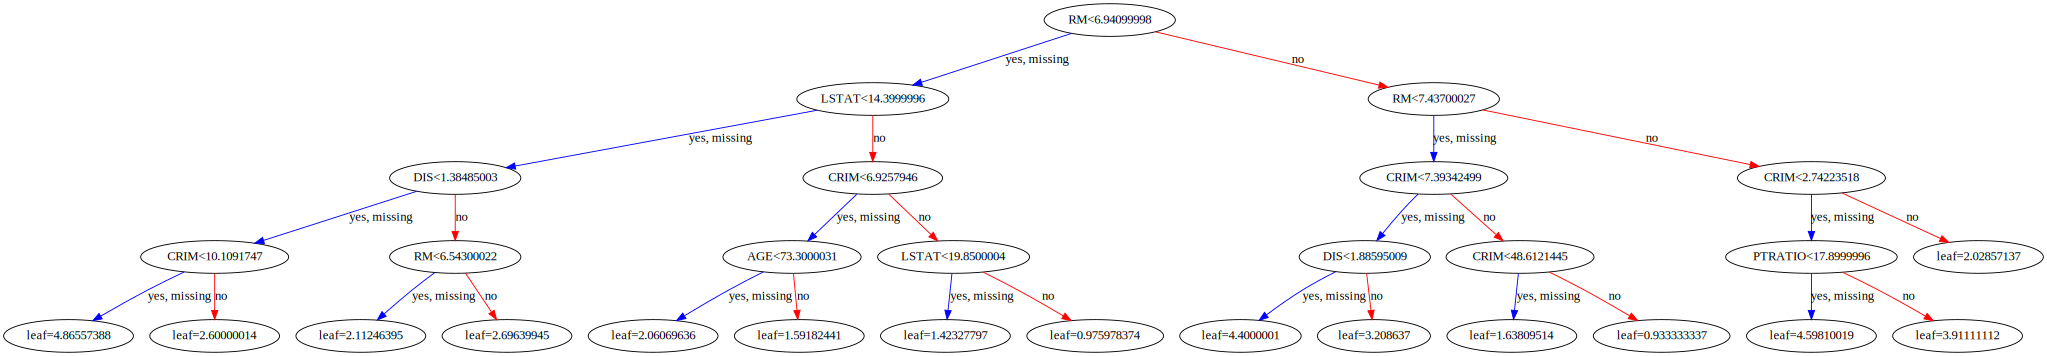

In [13]:
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
xgb.to_graphviz(model1_plus, fmap='', num_trees=0, rankdir=None, yes_color=None, no_color=None, 
            condition_node_params=None, leaf_node_params=None)

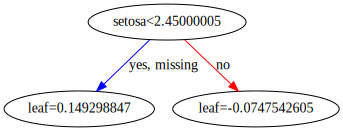

In [14]:
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
xgb.to_graphviz(model2_plus, num_trees=0, rankdir=None, yes_color=None, no_color=None, 
            condition_node_params=None, leaf_node_params=None)